In [1]:
import altair as alt
from vega_datasets import data
import pandas as pd
import numpy as np
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

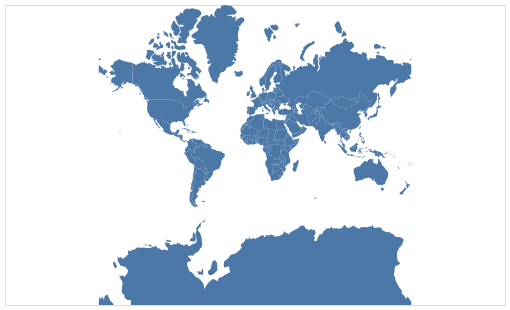

In [2]:
counties = alt.topo_feature(data.world_110m.url, 'countries')
unemp_data = data.unemployment.url


alt.Chart(counties).mark_geoshape().encode(
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(unemp_data, 'id', ['rate'])

).properties(
    width=500,
    height=300
)

In [13]:
from bs4 import BeautifulSoup
import requests

In [14]:
res = requests.get("https://en.wikipedia.org/wiki/ISO_3166-1_numeric#Officially_assigned_code_elements")
soup = BeautifulSoup(res.content,'xml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))[0]

df = df.drop(0)

df.iloc[0][0] = "004"
df.columns = ["Code", "Country"]

In [15]:
df.head()

,Code,Country
1,004,Afghanistan
2,008,Albania
3,010,Antarctica
4,012,Algeria
5,016,American Samoa


In [16]:
df = df.reset_index()
df.head(), df.shape

(   index Code         Country
 0      1  004     Afghanistan
 1      2  008         Albania
 2      3  010      Antarctica
 3      4  012         Algeria
 4      5  016  American Samoa, (249, 3))

In [ ]:
df.head(), df.shape

In [7]:
data = pd.read_csv('data/cpj.csv')
data.head()

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured
0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n
4,Motive Confirmed,"August 8, 2016",Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",No,Local,Political Group,Dangerous Assignment,NaN,No,No,No\n


In [40]:
countries = list(data['Country_killed'])

In [44]:
df_country = df.Country
df_codes = df.Code

codes_dict = dict(zip(df_country, df_codes))

In [53]:
codes_column = []
empty_countries = []
for c in countries:
    code = codes_dict.get(c, None)
    if not code:
        empty_countries.append(c)
    codes_column.append(code)

In [56]:
set(empty_countries)

{'Bolivia',
 'Bosnia',
 'Democratic Republic of the Congo',
 'East Timor',
 'Iran',
 'Israel and the Occupied Palestinian Territory',
 'Ivory Coast',
 'Republic of Congo',
 'Russia',
 'Syria',
 'Tanzania',
 'UK',
 'USA',
 'Venezuela',
 'Vietnam',
 'Yugoslavia',
 nan}

In [59]:
codes_dict['Russian Federation']

'643'

In [67]:
missing_countries = list(set(empty_countries))
missing_codes = [68, 70, 178, 626, 364, 376, 384, 178, 643, 760, 834, 826, 840, 862, 714, 890, np.nan]

In [68]:
len(missing_codes) == len(missing_countries)

True

In [69]:
for i in range(len(missing_countries)):
    codes_dict[missing_countries[i]] = missing_codes[i]

In [77]:
codes_column_2 = []
empty_countries_2 = []
for c in countries:
    code = codes_dict.get(c, None)
    if not code:
        empty_countries.append(c)
    codes_column_2.append(code)

In [78]:
empty_countries_2

[]

In [80]:
len(codes_column_2)== data.shape[0]

True

In [81]:
data['Country_code'] = codes_column_2

In [83]:
data.head()

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured,Country_code
0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,368
1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,368
2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,434
3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n,368
4,Motive Confirmed,"August 8, 2016",Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",No,Local,Political Group,Dangerous Assignment,NaN,No,No,No\n,586


In [96]:
country_counts_df = data.groupby('Country_killed').count()

final_country_counts = []
final_country_names = country_counts_df.index.values
final_country_codes = []
for i in range(country_counts_df.shape[0]):
    code = codes_dict[final_country_names[i]]
    final_country_codes.append(code)
    
    count = max(country_counts_df.iloc[i])
    final_country_counts.append(count)

In [97]:
final_counts_df = pd.DataFrame()
final_counts_df['Country'] = final_country_names
final_counts_df['Code'] = final_country_codes
final_counts_df['Count'] = final_country_counts

final_counts_df.head()

,Country,Code,Count
0,Afghanistan,004,36
1,Algeria,012,61
2,Angola,024,11
3,Argentina,032,4
4,Armenia,051,1


In [ ]:
countries = alt.topo_feature(data.world_110m.url, 'countries')

alt.Chart(countries).mark_geoshape().encode(
    tooltip='id:N'
).project(
    'equirectangular'
).properties(
    width=800,
    height=500,
)